In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from visualise import visualise_v_quiver

In [2]:
# Import all simulation functions
from simulate import (
    simulate_detailed_convergence,
    simulate_detailed_deflection,
    simulate_detailed_curve,
    simulate_detailed_ridges,
    simulate_detailed_branching,
)

# Define simulations as a dictionary with names as keys to function objects
simulations = {
    "convergence_dtl": simulate_detailed_convergence,
    "deflection_dtl": simulate_detailed_deflection,
    "curve_dtl": simulate_detailed_curve,
    "ridges_dtl": simulate_detailed_ridges,
    "branching_dtl": simulate_detailed_branching,
}

In [3]:
x_train = torch.load("data/sim_data/x_train_lines_discretised_0to1.pt", weights_only = False).float()

# Storage dictionaries
y_train_dict = {}

# Make y_train_dict: Iterate over all simulation functions
for sim_name, sim_func in simulations.items():

    # Generate training observations
    y_train = sim_func(x_train)
    y_train_dict[sim_name] = y_train  # Store training outputs

from configs import N_SIDE
N_SIDE = N_SIDE

side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

# Storage dictionaries
y_test_dict = {}

# Make y_test_dict: Iterate over all simulation functions
for sim_name, sim_func in simulations.items():

    # Generate test observations
    y_test = sim_func(x_test)
    y_test_dict[sim_name] = y_test  # Store test outputs

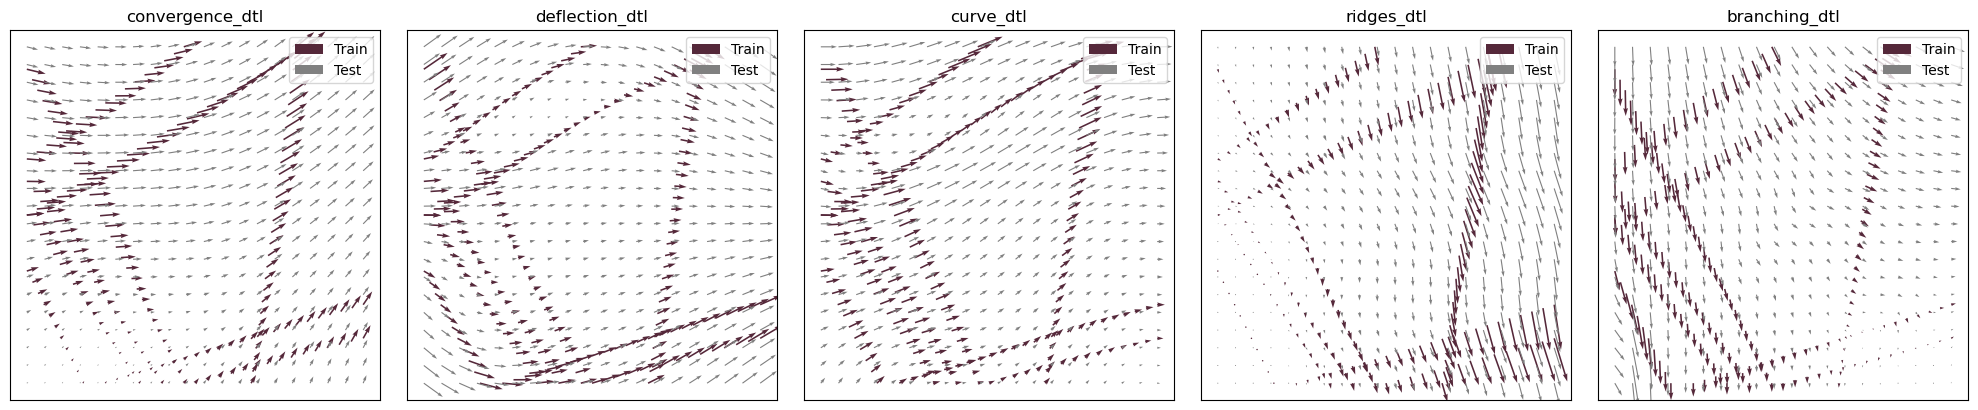

In [9]:
x_train = x_train.detach()
x_test = x_test.detach()

# Define colors
train_color = "#55283a"  # Dark color for training data
test_color = "gray"  # Light gray for test data

# Create figure with 5 subplots (one for each simulation)
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for ax, (sim_name, y_train) in zip(axes, y_train_dict.items()):
    # Extract training and test vectors
    y_test = y_test_dict[sim_name]
    
    # Plot training data in dark color
    ax.quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = train_color, label = "Train")
    
    # Plot test data in light gray
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = test_color, label = "Test")
    
    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")
    ax.set_title(sim_name)
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_1273042/3922649744.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


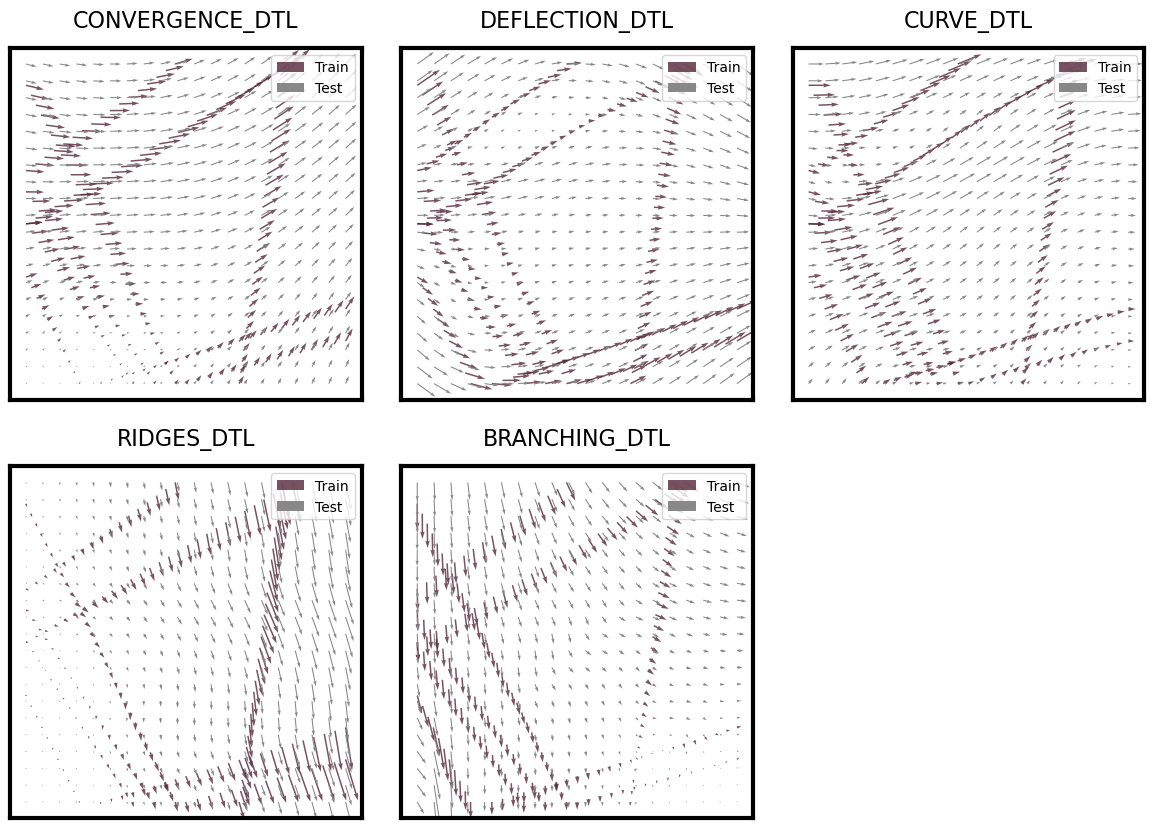

In [10]:
import matplotlib.pyplot as plt
import torch

# Define colors
train_color = "#55283a"  # Dark color for training data
test_color = "#888888"   # Darker grey for test data

# Create figure with 2 rows and 3 columns (one will be empty)
fig, axes = plt.subplots(2, 3, figsize = (15, 10), gridspec_kw = {'hspace': 0.19, 'wspace': 0.03}) 

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, (sim_name, y_train) in enumerate(y_train_dict.items()):
    ax = axes[i]  # Select the corresponding subplot
    
    # Extract training and test vectors
    y_test = y_test_dict[sim_name]
    
    # Plot training data in dark color
    ax.quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = train_color, alpha = 0.8, label = "Train")
    
    # Plot test data in darker grey
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = test_color, label = "Test")
    
    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_aspect('equal')
    ax.legend()
    
    # Capitalized title with larger font size and extra padding
    ax.set_title(sim_name.upper(), fontsize = 16, pad = 15)

    # Thicker border
    for spine in ax.spines.values():
        spine.set_linewidth(3)
        spine.set_color("black")

# Remove the unused subplot (6th subplot in 2x3 layout)
fig.delaxes(axes[-1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Plots suitable for dfNN

In [ ]:
model_name = "dfNN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfNN_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
model_name = "dfNN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_dfNN_test_predictions.pt"
    pred = torch.load(path) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

In [ ]:
model_name = "dfNN_fullmatrix"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_dfNN_fullmatrix_test_predictions.pt"
    pred = torch.load(path) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# HNN

In [ ]:
model_name = "HNN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_HNN_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
model_name = "HNN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_HNN_test_predictions.pt"
    pred = torch.load(path) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# PINN

- plot both loss components

In [ ]:
model_name = "PINN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_PINN_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss (RMSE)", color = "red")
    # Scale it?
    # plt.plot(losses["Epoch"], losses["Test Loss"] * 0.3, label = "Test Loss", color = "pink")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss (RMSE)", color = "blue")
    plt.plot(losses["Epoch"], losses["Train Loss"], label = "Train Loss mean(RMSE + div)", color = "lightblue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
model_name = "PINN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_PINN_test_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# dfGP

### Plot NLML loss (which we minimize)

In [ ]:
model_name = "dfGP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Test Loss", color = "red")
    # plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("NLML Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training Loss (NLML) over Epochs")
    plt.legend()
    plt.grid()

    plt.show()

## Plot RMSE

In [ ]:
model_name = "dfGP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss (RMSE) over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

## Plot hypers

In [ ]:
model_name = "dfGP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Sigma_f"], label = "Sigma f", color = "cornflowerblue")
    plt.plot(losses["Epoch"], losses["l1"], label = "l1", color = "green")
    plt.plot(losses["Epoch"], losses["l2"], label = "l2", color = "grey")
    plt.ylim(0, None) # here we fix y_min to zero
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss (RMSE) over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
model_name = "dfGP"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_dfGP_test_mean_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Predictions"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# GP

In [ ]:
model_name = "GP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_GP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Test Loss", color = "red")
    # plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("NLML Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training Loss (NLML) over Epochs")
    plt.legend()
    plt.grid()

    plt.show()

In [ ]:
model_name = "GP"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_GP_test_mean_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Predictions"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

In [ ]:
model_name = "GP"
for sim_name, _ in simulations.items():
    path_mean = "results/" + model_name + "/" + sim_name + "_GP_test_mean_predictions.pt"
    path_covar = "results/" + model_name + "/" + sim_name + "_GP_test_covar_predictions.pt"
    mean = torch.load(path_mean, weights_only = False) # tensor
    covar = torch.load(path_covar, weights_only = False) # tensor
    break

In [ ]:
from utils import sample_posterior

samples = sample_posterior(mean, covar, n_samples = 10)

visualise_v_quiver(samples[9], x_test, title_string = "GP Predictive Samples")

# dfGP dfNN

In [ ]:
model_name = "dfGPdfNN_more_epochs"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_" + "dfGPdfNN" + "_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Test Loss", color = "red")
    # plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("NLML Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training Loss (NLML) over Epochs")
    plt.legend()
    plt.grid()

    plt.show()

In [ ]:
model_name = "dfGPdfNN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_" + "dfGPdfNN" + "_test_mean_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Predictions"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

In [ ]:
model_name = "dfGPdfNN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_" + "dfGPdfNN" + "_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Sigma_f"], label = "Sigma f", color = "cornflowerblue")
    plt.plot(losses["Epoch"], losses["l1"], label = "l1", color = "green")
    plt.plot(losses["Epoch"], losses["l2"], label = "l2", color = "grey")
    plt.ylim(0, None) # here we fix y_min to zero
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss (RMSE) over Epochs")
    plt.legend()
    plt.grid()
    plt.show()